In [20]:
import sys
!{sys.executable} -m pip install lazypredict
!{sys.executable} -m pip install plotly.express


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 15.3/15.3 MB 5.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [139]:

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# collect the csv file data
math = pd.read_csv('Maths.csv',index_col=None)
portuguese = pd.read_csv('Portuguese.csv',index_col=None)
#convert categories into numbers to allow for modeling
LEncode = LabelEncoder()
each_feature = math.select_dtypes(include = ['object']).columns
for column in each_feature:
    math[column] = LEncode.fit_transform(math[column])
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [144]:
each_feature = portuguese.select_dtypes(include = ['object']).columns
for column in each_feature:
    portuguese[column] = LEncode.fit_transform(portuguese[column])
portuguese

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,10


In [136]:
math_x = math.copy();
math_x.drop('G3',axis = 1,inplace = True)
math_y = math['G3']
math_x_train_t, math_x_test, math_y_train, math_y_test = train_test_split(math_x, math_y, test_size=0.2,random_state=0)
standScale = StandardScaler()
math_x_train = standScale.fit_transform(math_x_train_t)
math_x_test = standScale.transform(math_x_test)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
model_math,prediction_math = clf.fit(math_x_train, math_x_test, math_y_train, math_y_test)


100%|██████████| 29/29 [00:06<00:00,  4.25it/s]


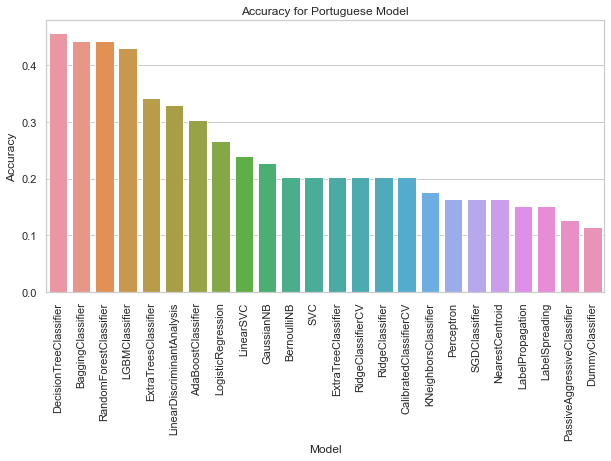

In [39]:
model_math.sort_values(by = 'Accuracy',inplace = True,ascending = False)
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=model_math.index, y="Accuracy", data=model_math)
plt.xticks(rotation=90)
plt.title('Accuracy for Math Model')
plt.show()

64     10
55     10
343     0
219    10
366    13
       ..
323    15
192     8
117    13
47     20
172    10
Name: G3, Length: 316, dtype: int64

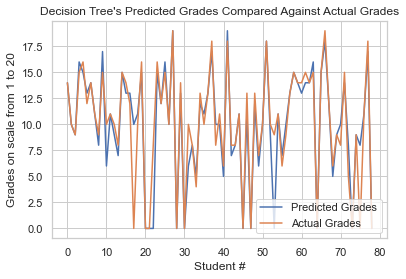

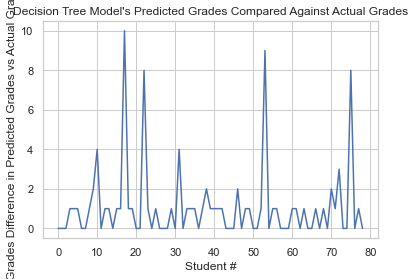

In [89]:
#take the most successful prediction model and compare predicted data versus actual data
clf = DecisionTreeClassifier()
clf.fit(math_x_train, math_y_train)
predictions = clf.predict(math_x_test)
plt.plot(range(len(predictions)), predictions, label ="")
plt.plot(range(len(predictions)), math_y_test, label ="")
plt.title("Math: Decision Tree's Predicted Grades Compared Against Actual Grades")
plt.xlabel("Student #")
plt.ylabel("Grades on scale from 1 to 20")
plt.legend(["Predicted Grades", "Actual Grades"], loc ="lower right")
plt.show()
plt.plot(range(len(predictions)), abs(math_y_test-predictions))
plt.title("Decision Tree Model's Predicted Grades Compared Against Actual Grades")
plt.xlabel("Student #")
plt.ylabel("Grades Difference in Predicted Grades vs Actual Grades")
#zero means perfect correlation
plt.show()
#plot predictions, and the y_tEst OveR math_x_tesT to see how well prediction preformed

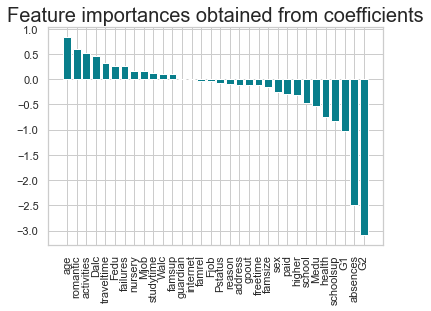

In [140]:
model = LogisticRegression()
model.fit(math_x_train, math_y_train)
importances = pd.DataFrame(data={
    'Attribute': math_x_train_t.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances related to Grades 3 obtained from Math coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [146]:
portuguese_x = portuguese.copy();
portuguese_x.drop('G3',axis = 1,inplace = True)
portuguese_y = portuguese['G3']
portuguese_x_train_t, portuguese_x_test, portuguese_y_train, portuguese_y_test = train_test_split(portuguese_x, portuguese_y, test_size=0.2,random_state=0)
standScale = StandardScaler()
portuguese_x_train = standScale.fit_transform(portuguese_x_train_t)
portuguese_x_test = standScale.transform(portuguese_x_test)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
model_portuguese,prediction_portuguese = clf.fit(portuguese_x_train, portuguese_x_test, portuguese_y_train, portuguese_y_test)

100%|██████████| 29/29 [00:10<00:00,  2.69it/s]


In [88]:
model_portuguese.sort_values(by = 'Accuracy',inplace = True,ascending = False)
data_points = px.line(data_frame= model_portuguese ,y =["Accuracy"] , markers = True)
data_points.update_xaxes(title="Model",
              rangeslider_visible = False)
data_points.update_yaxes(title = "Accuracy")
data_points.update_traces(line_color="blue")
data_points.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy for Portuguese Model'})

data_points.show()

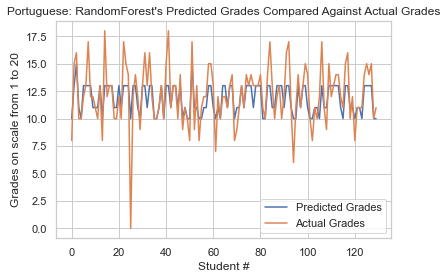

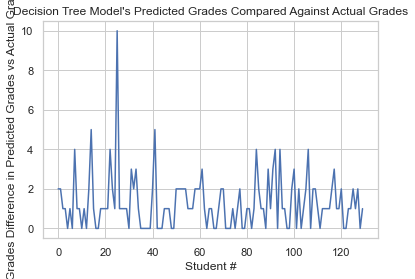

In [95]:
#Will use random forestclassifier since it is most accurate for Portuguese Data Model
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(portuguese_x_train, portuguese_y_train)
predictions = clf.predict(portuguese_x_test)
plt.plot(range(len(predictions)), predictions, label ="")
plt.plot(range(len(predictions)), portuguese_y_test, label ="")
plt.title("Portuguese: RandomForest's Predicted Grades Compared Against Actual Grades")
plt.xlabel("Student #")
plt.ylabel("Grades on scale from 1 to 20")
plt.legend(["Predicted Grades", "Actual Grades"], loc ="lower right")
plt.show()
plt.plot(range(len(predictions)), abs(portuguese_y_test-predictions))
plt.title("Decision Tree Model's Predicted Grades Compared Against Actual Grades")
plt.xlabel("Student #")
plt.ylabel("Grades Difference in Predicted Grades vs Actual Grades")
#zero means perfect correlation
plt.show()
#plot predictions, and the y_tEst OveR math_x_tesT to see how well prediction preformed

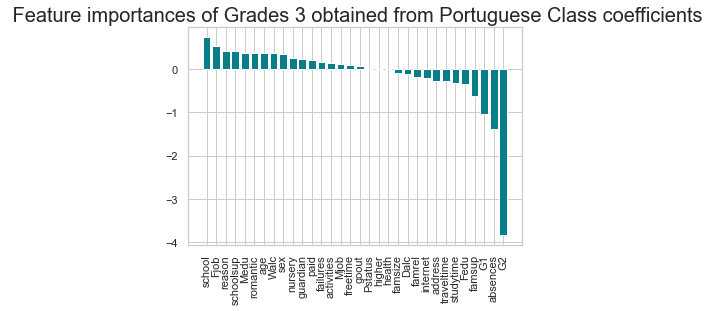

In [147]:
model = LogisticRegression()
model.fit(portuguese_x_train, portuguese_y_train)
importances = pd.DataFrame(data={
    'Attribute': portuguese_x_train_t.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title(' Feature importances of Grades 3 obtained from Portuguese Class coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()